# Link prediction on condensed matter collaborations

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from ..bin import linkprediction

papers = get_papers(start=1995)
edges = get_edgelist(papers)
g = from_edgelist(edges)

ImportError: attempted relative import with no known parent package

## Data characteristics

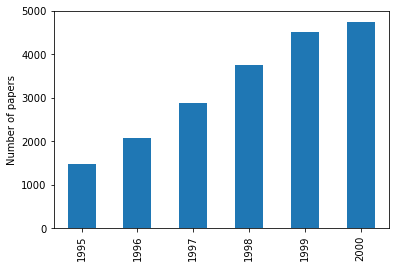

In [2]:
d = pd.Series([date.year for authors, date in papers if len(authors) > 1])
d.value_counts().sort_index().plot.bar()
plt.ylim(0, 5000)
plt.ylabel('Number of papers')
plt.savefig('temp/paperPerYear.svg')
plt.show()

In [8]:
d.value_counts(normalize=True).sort_index().cumsum()

1995    0.075480
1996    0.181944
1997    0.330182
1998    0.523379
1999    0.755832
2000    1.000000
dtype: float64

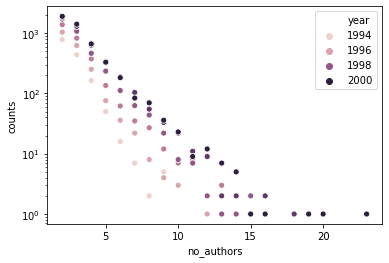

In [11]:
d = pd.DataFrame([dict(no_authors=len(authors), year=date.year) for authors, date in papers if len(authors) > 1])
d = d.groupby(['no_authors', 'year']).size().reset_index(name='counts')
sns.scatterplot('no_authors', 'counts', 'year', data=d, cmap='blues')
plt.yscale('log')
plt.savefig('temp/authorsPerPaper.svg')
plt.show()

## Graph characteristics

In the network `g` each node is an author. We connect two authors if they published a paper where they are co-authoring.

In [4]:
graph.describe(g)

Number of edges: 55275
	 in GC: 52588 (95%)
Number of nodes: 17216
	 in GC: 15081 (88%)
Density (in GC): 3.7e-04 (4.6e-04)


### Degree
The degree distrubtion of g. Up: without weights taking into account. Bottom: with taking weights into account. 

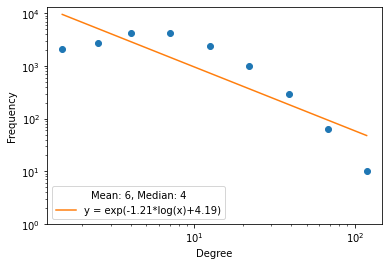

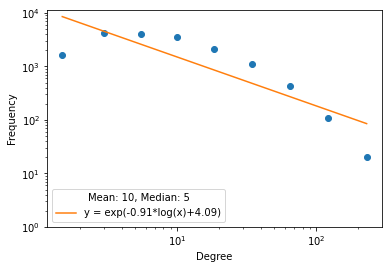

In [5]:
graph.degreeDistribution(g)
graph.degreeDistribution(g, 'weight')

### Density

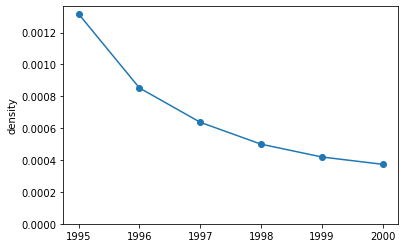

In [6]:
pd.Series({year: nx.density(from_edgelist(get_edgelist(stop=year))) for year in {attribute['date'].year for _, _, attribute in edges}}).plot(marker='o')
plt.ylabel('density')
plt.ylim(0);

### Weight
The distribution of weights (over the edges).

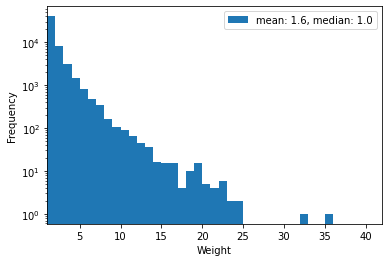

In [7]:
graph.weightDistribution(g, yscale='log')

### Distance

In [8]:
### Install teexgraph
# !wget -P /data/bruingjde https://github.com/franktakes/teexgraph/archive/master.zip
# !unzip /data/bruingjde/master.zip
# !rm /data/bruingjde/master.zip
# !mv /data/bruingjde/teexgraph-master/ /data/bruingjde/teexgraph
# !make /data/bruingjde/teexgraph listener

In [9]:
%%time
%%capture
!printf '%s\n' 'load_undirected temp/network.edges' 'dist_distri' > "temp/input.txt"
nx.write_edgelist(g, 'temp/network.edges', data=False)
! /data/bruingjde/teexgraph/teexgraph < temp/input.txt > temp/output.txt

def weighted_median(df: pd.Series) -> int:
    return (df.cumsum() < (df.sum() / 2)).idxmin()

CPU times: user 183 ms, sys: 36 ms, total: 219 ms
Wall time: 7.02 s


mean=6.3
median=6


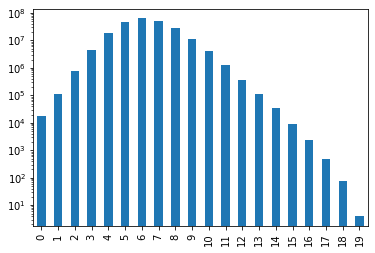

In [10]:
distances = pd.read_csv('temp/output.txt', '\t', names=['distance', 'counts'])['counts']
mean = np.average(distances.index, weights=distances)
distances.plot.bar()
plt.yscale('log')
print(f'{mean=:.1f}')
print(f'median={weighted_median(distances):.0f}')